In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Iris.csv')#creating a data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.head(200)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

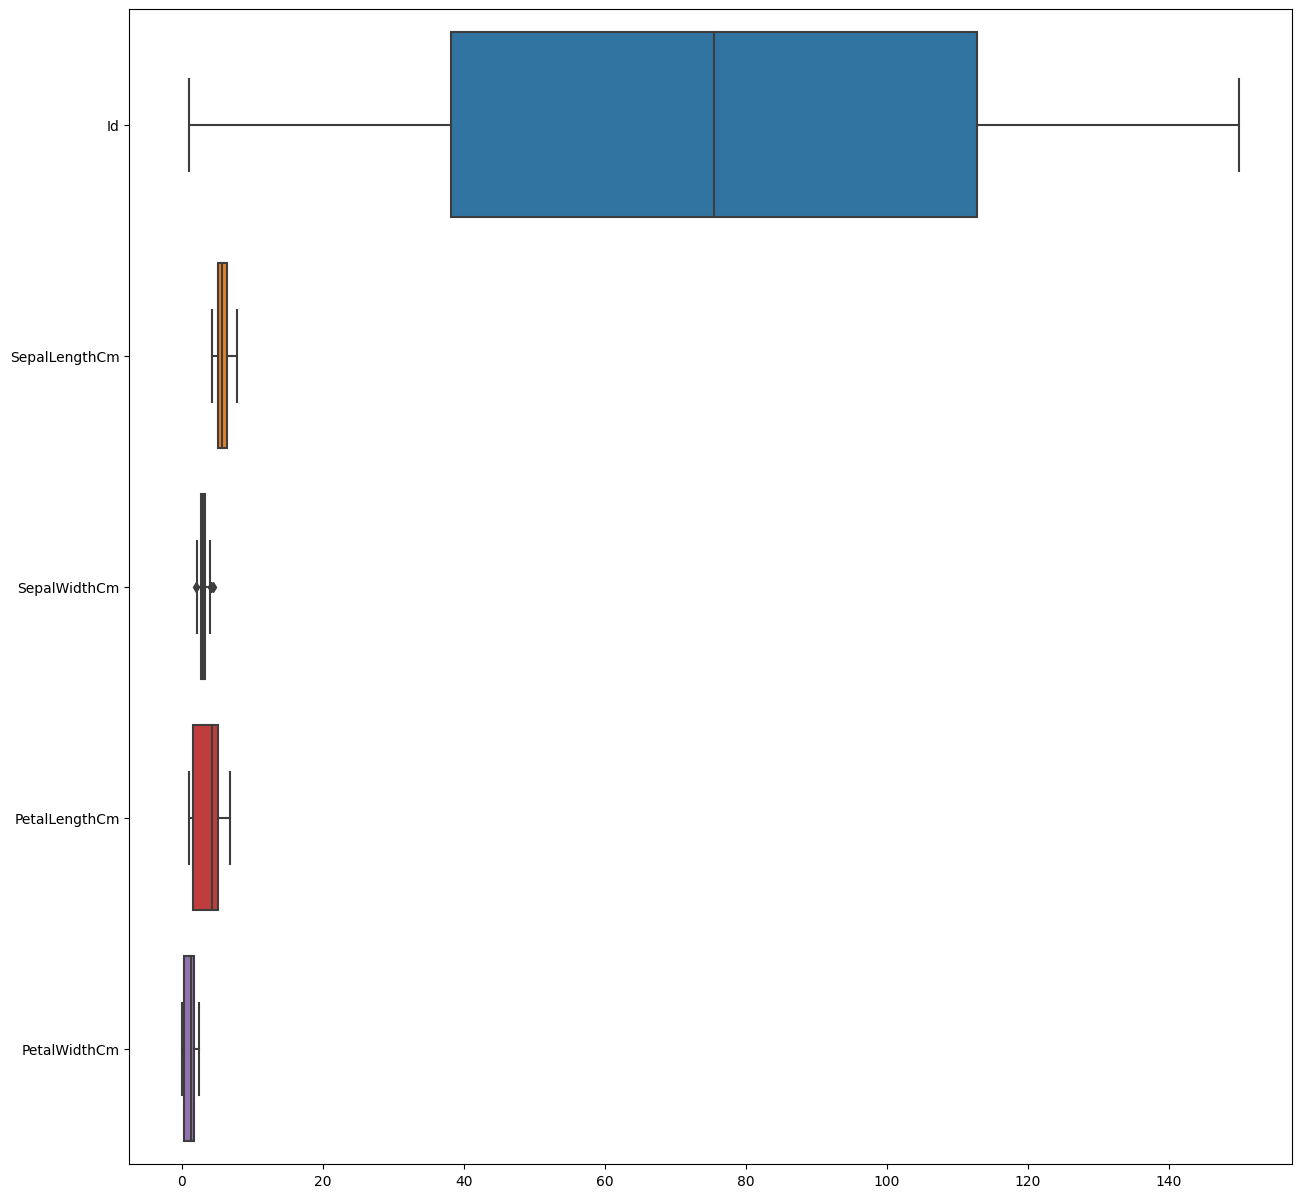

In [ ]:
from matplotlib import axes
plt.figure(figsize=(15,15))
sns.boxplot(df,orient='h')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


<ipython-input-60-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-60-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-61-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(146, 6)

<Axes: >

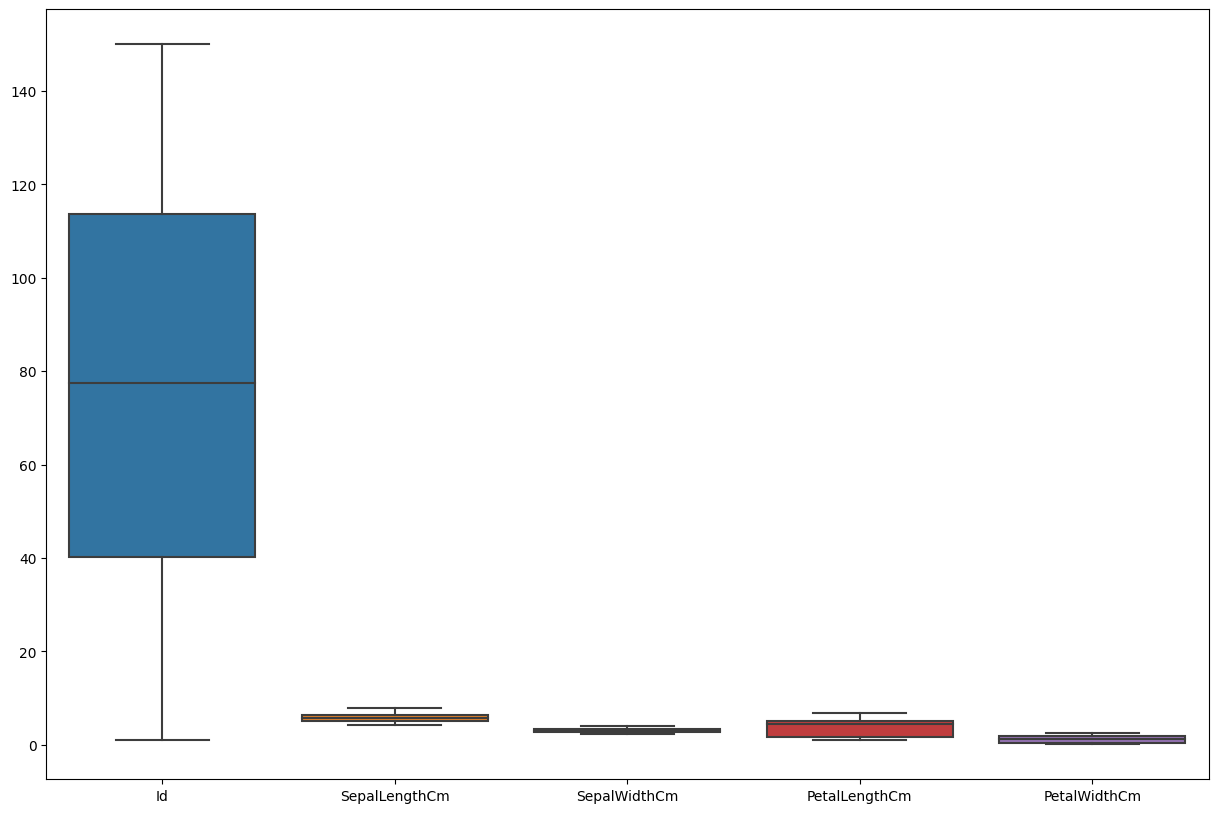

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             146 non-null    int64  
 1   SepalLengthCm  146 non-null    float64
 2   SepalWidthCm   146 non-null    float64
 3   PetalLengthCm  146 non-null    float64
 4   PetalWidthCm   146 non-null    float64
 5   Species        146 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


In [ ]:
'''


DBScan is a clustering algorithm that’s used cluster data into groups.
It is also used as a density-based anomaly detection method with either single or multi-dimensional data.
Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers.
In this instance, I will show you an example of using DBScan but before we start, let’s cover some important concepts.
DBScan has three important concepts:
1.Core Points: In order to understand the concept of the core points,
  we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP)is min_samples.
  This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps.
   eps is the maximum distance between two samples for them to be considered as in the same cluster.
2.Border Points are in the same cluster as core points but much further away from the centre of the cluster.
3.Everything else is called Noise Points, those are data points that do not belong to any cluster.
They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.
'''


'\n\n\nDBScan is a clustering algorithm that’s used cluster data into groups. \nIt is also used as a density-based anomaly detection method with either single or multi-dimensional data. \nOther clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers.\nIn this instance, I will show you an example of using DBScan but before we start, let’s cover some important concepts.\nDBScan has three important concepts:\n1.Core Points: In order to understand the concept of the core points, \n  we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP)is min_samples. \n  This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps.\n   eps is the maximum distance between two samples for them to be considered as in the same cluster.\n2.Border Points are in the same cluster as core points but much further away from the centre of the cluster.\n3.Everything else is called No

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=12.5, min_samples=4).fit(df[['SepalLengthCm','SepalWidthCm']])
df.loc[:,'Cluster'] = clustering.labels_
df.Cluster.value_counts().to_frame()

,Cluster
0,146


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(df[['SepalWidthCm']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7A2563009240, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df['scores'] = model.decision_function(df[['SepalWidthCm']])

df['anomaly_score'] = model.predict(df[['SepalWidthCm']])

df[df['anomaly_score']==-1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,scores,anomaly_score
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,-0.054083,-1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0,-0.124476,-1
10,11,5.4,3.7,1.5,0.2,Iris-setosa,0,-0.083107,-1
14,15,5.8,4.0,1.2,0.2,Iris-setosa,0,-0.225176,-1
16,17,5.4,3.9,1.3,0.4,Iris-setosa,0,-0.124476,-1
